In [1]:
#main imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
import missingno as msno
import seaborn as sb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

In [2]:
#import csv and create pandas dataframe
stroke_df = pd.read_csv('/Users/neilsuji/Downloads/healthcare-dataset-stroke-data.csv')
stroke_df = pd.DataFrame(stroke_df)
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#check for missing values
stroke_df.isnull().sum().sort_values(ascending=False)

bmi                  201
stroke                 0
smoking_status         0
avg_glucose_level      0
Residence_type         0
work_type              0
ever_married           0
heart_disease          0
hypertension           0
age                    0
gender                 0
id                     0
dtype: int64

In [4]:
#since bmi is the only column with missing values, filling n/a values in BMI 
stroke_df.fillna(value= np.mean(stroke_df['bmi']), axis = 1, inplace = True)

#drop id column because it doesn't help us
stroke_df = stroke_df.drop(['id'], axis = 1)

In [5]:
#lets divide the dataset into categorical and numerical sets
# Classifying data into numerical and categorical variables.
stroke_df_numerical=stroke_df[['age','avg_glucose_level','bmi']]
stroke_df_categorical=stroke_df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status', 'stroke']]

In [6]:
stroke_df_numerical

,age,avg_glucose_level,bmi
0,67.0,228.69,36.600000
1,61.0,202.21,28.893237
2,80.0,105.92,32.500000
3,49.0,171.23,34.400000
4,79.0,174.12,24.000000
...,...,...,...
5105,80.0,83.75,28.893237
5106,81.0,125.20,40.000000
5107,35.0,82.99,30.600000
5108,51.0,166.29,25.600000


In [7]:
#get an assessment of the dataset with EDA
print(stroke_df.dtypes)
print(pd.Series.unique(stroke_df['work_type']))
print(stroke_df.describe())

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
               age  hypertension  heart_disease  avg_glucose_level  \
count  5110.000000   5110.000000    5110.000000        5110.000000   
mean     43.226614      0.097456       0.054012         106.147677   
std      22.612647      0.296607       0.226063          45.283560   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.245000   
50%      45.000000      0.000000       0.000000          91.885000   
75%      61.000000      0.000000       0.000000         114.090000   
max      82.000000      1.000000       1.0

In [8]:
stroke_df.value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Other   26.00  0             0              No            Private    Rural           143.33             22.4  formerly smoked  0         1
Female  49.00  0             0              Yes           Private    Urban           114.50             35.9  formerly smoked  0         1
                                                                                     67.55              17.6  formerly smoked  0         1
                                                                                     67.68              24.8  formerly smoked  0         1
                                                                                     72.18              30.8  Unknown          0         1
                                                                                                                                        ..
Male    16.00  0             0  

<AxesSubplot:>

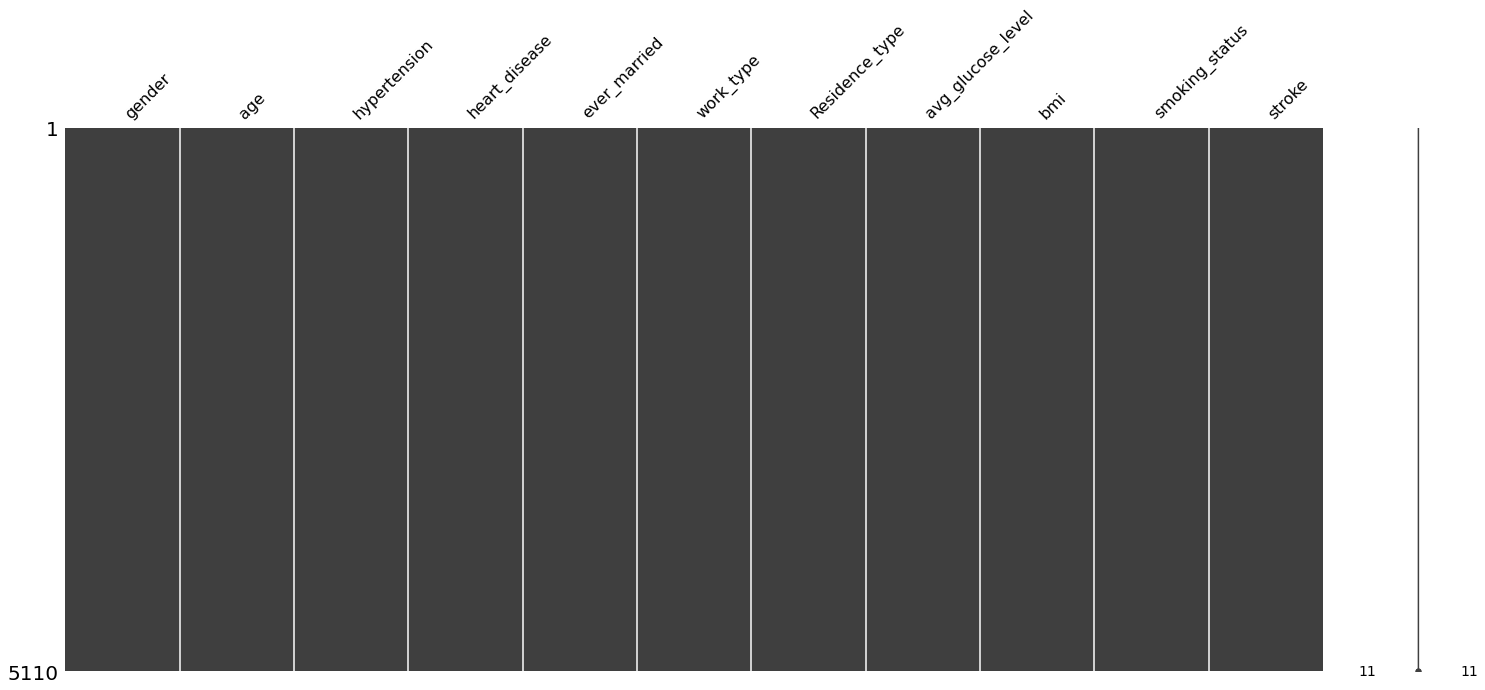

In [9]:
#Check for missing values w/ missingno 
msno.matrix(stroke_df)

By the correlation matrix, we don't see a meaningful correlation between the variables age, avg glucose level or BMI to stroke. Since hypertension and heart disease are binary values, their correlations are meaningless.


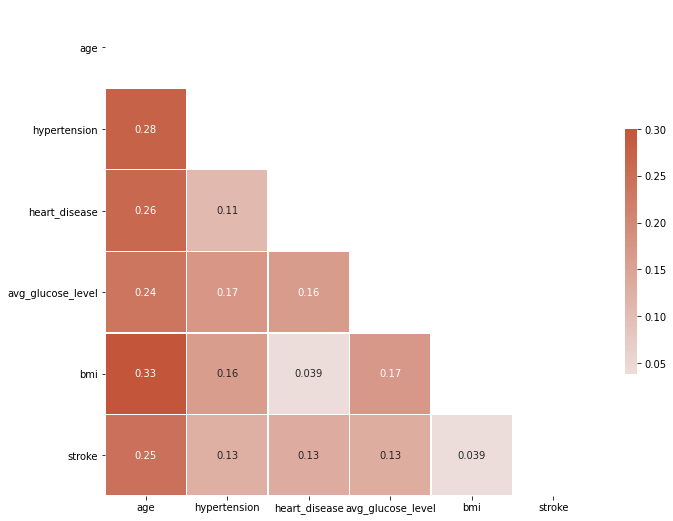

In [10]:
#creating a correlation heat map to check for correlated variables
correlation = stroke_df.corr()

#create mask for triangular shape
mask = np.triu(np.ones_like(correlation))

#setting up matplotlib figure
fig, ax = plt.subplots(figsize = (11,9))

#setting up colormap
cmap = sb.diverging_palette(230, 20, as_cmap= True)

#heatmap with the mask and aspect ratio
sb.heatmap(correlation,mask= mask, cmap=cmap, vmax = 0.3, center = 0,
           square = True, linewidths = 0.5, cbar_kws={"shrink": .5}, annot = True)

print("By the correlation matrix, we don't see a meaningful correlation between the variables age, avg glucose level or BMI to stroke. Since hypertension and heart disease are binary values, their correlations are meaningless.")

<AxesSubplot:ylabel='Density'>

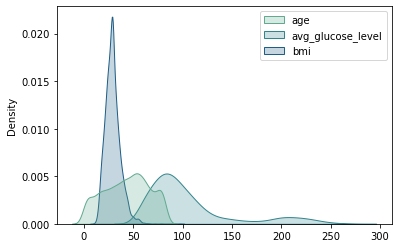

In [11]:
#lets use a kernel density estimate to get a feel for how many people have stroke as well as other numerical variables
#such as bmi, average glucose level and age
sb.kdeplot(data=stroke_df_numerical, shade=True, palette = 'crest')

<AxesSubplot:xlabel='age', ylabel='Density'>

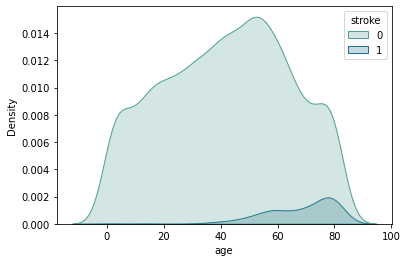

In [12]:
#lets isolate these variables in relationship to stroke
#age in relationship to stroke
sb.kdeplot(x=stroke_df['age'], hue= stroke_df['stroke'], shade= True, palette = 'crest')

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

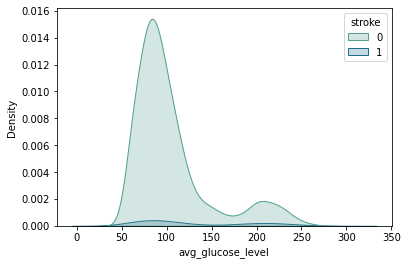

In [13]:
#average glucose level in relationship to stroke
sb.kdeplot(x=stroke_df['avg_glucose_level'], hue= stroke_df['stroke'], shade= True, palette = 'crest')

<AxesSubplot:xlabel='bmi', ylabel='Density'>

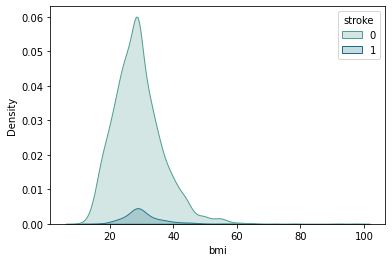

In [14]:
#bmi in relationship to stroke
sb.kdeplot(x=stroke_df['bmi'], hue= stroke_df['stroke'], shade= True, palette = 'crest')

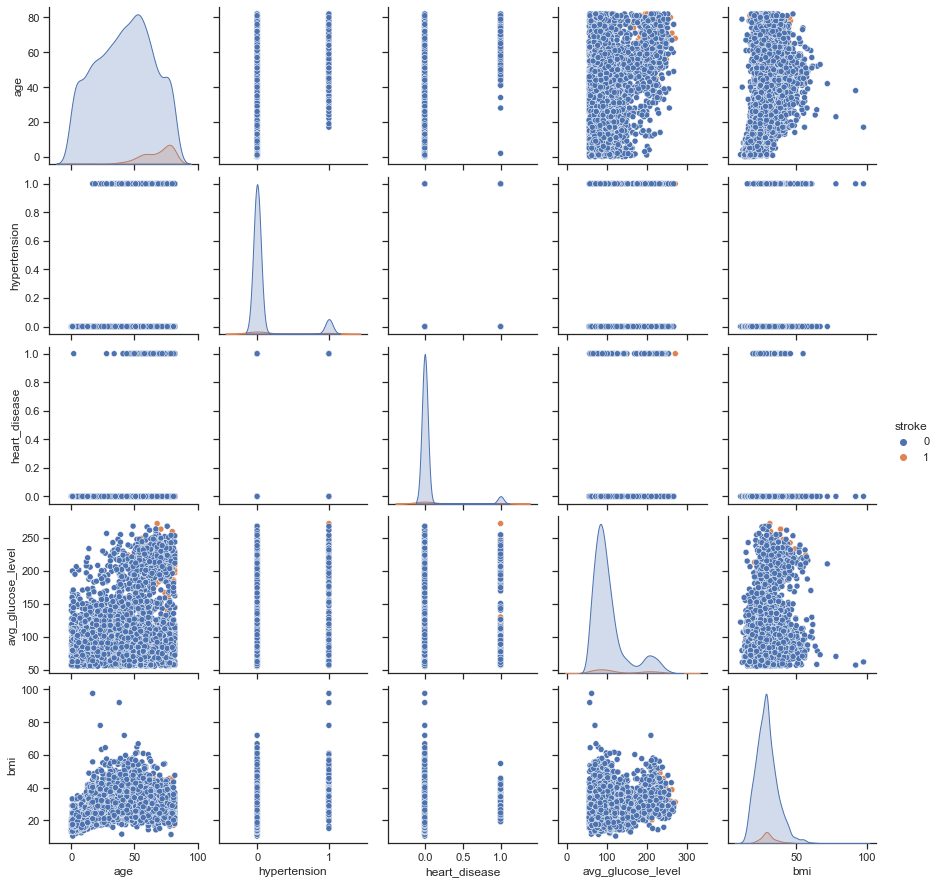

In [15]:
#here we can see categorical and numerical data both plotted as KDE and scatter plots
sb.set_theme(style="ticks")

sb.pairplot(stroke_df, hue="stroke")

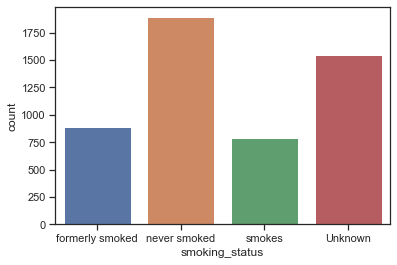

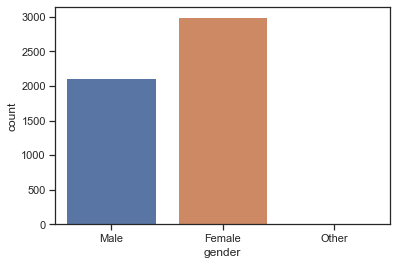

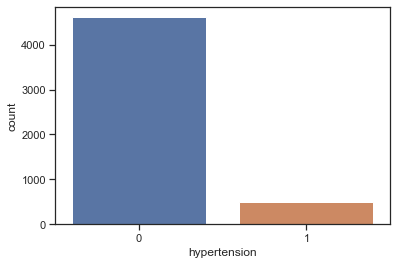

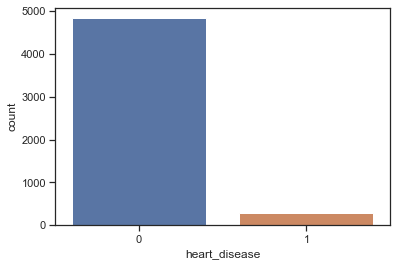

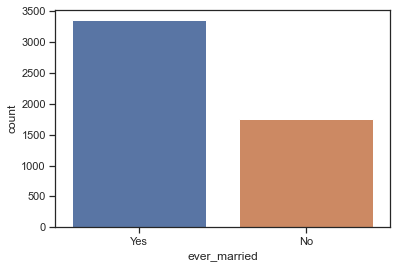

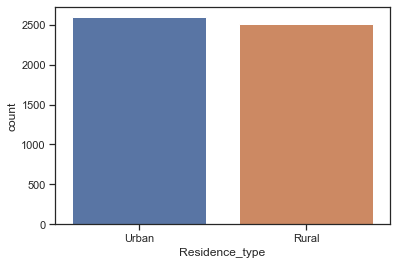

In [16]:
#we can count the categorical data
#raw counts of different smoking status'
sb.countplot(x= stroke_df['smoking_status'], data = stroke_df)

plt.show();
#plot to see gender counts
sb.countplot(x= stroke_df['gender'], data = stroke_df)
plt.show();
#how many patients have hypertension
sb.countplot(x= stroke_df['hypertension'], data = stroke_df)
plt.show();
#how many people have had heart disease
sb.countplot(x= stroke_df['heart_disease'], data = stroke_df)
plt.show();
#how many people have been married previously
sb.countplot(x= stroke_df['ever_married'], data = stroke_df)
plt.show();
#the count of resident types
sb.countplot(x= stroke_df['Residence_type'], data = stroke_df)
plt.show();

<AxesSubplot:xlabel='age', ylabel='Count'>

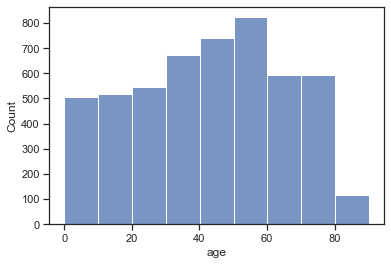

In [17]:
#take a look at age distribution
sb.histplot(data = stroke_df, x = stroke_df['age'], stat = 'count', bins = 10, binwidth = 10)

<AxesSubplot:xlabel='work_type', ylabel='Count'>

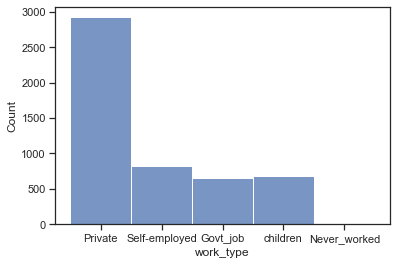

In [18]:
#lets see the multiple types of workers in the dataset
sb.histplot(data= stroke_df, x = 'work_type', stat = 'count', bins = 5, binwidth = 10)

In [19]:
stroke = stroke_df['stroke']

In [20]:
#one hot encode strings to binary values in the data
import sklearn.preprocessing as preprocessing
stroke_df.replace('Male', 1, inplace=True, regex=True)
stroke_df.replace('Female', 0, inplace=True, regex=True)
stroke_df.replace('Yes', 1, inplace=True, regex=True)
stroke_df.replace('No', 0, inplace=True, regex=True)
stroke_df.replace('Urban', 1, inplace=True, regex=True)
stroke_df.replace('Rural', 0, inplace=True, regex=True)

In [21]:
stroke = stroke_df['stroke']
stroke_df.drop(stroke_df['stroke'], inplace=True)
stroke_df = pd.get_dummies(stroke_df, columns= ['work_type', 'smoking_status'])

In [ ]:
stroke_df

In [22]:
stroke = pd.DataFrame(np.resize(stroke.values, (5108)))

In [23]:
#sklearn train test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(stroke_df, stroke, test_size=0.2, train_size=0.8)

In [ ]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

In [ ]:
stroke.shape

In [ ]:
stroke.shape

In [ ]:
stroke

In [30]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from itertools import product

def ensemble_classifier(X,y):
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    class_1 = LogisticRegression(random_state=1)
    class_2 = RandomForestClassifier(n_estimators=50, random_state=1)
    class_3 = SVC(kernel='rbf', probability=True)

    ensemble = VotingClassifier(
        estimators=[('logreg', class_1), ('randforest', class_2), ('svc', class_3)],
        voting='soft')

    for clf, label in zip([class_1,class_2,class_3,ensemble], ['Logistic Regression', 'Random Forest', ' Kernel SVC', 'Ensemble']):
        scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
        print("Accuracy:{:.2f},{:.2f},{}".format(scores.mean(),scores.std(), label))

In [31]:
ensemble_classifier(X=x_train, y=y_train)

/Users/neilsuji/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:0.97,0.02,Logistic Regression
Accuracy:0.97,0.02,Random Forest
Accuracy:0.97,0.02, Kernel SVC
Accuracy:0.97,0.02,Ensemble


/Users/neilsuji/Library/Python/3.8/lib/python/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
ensemble_classifier(X=x_test, y=y_test)

In [ ]:
import sklearn.metrics 
sklearn.metrics.confusion_matrix()

In [ ]:
#subtracting means from values to get zero mean
for values in stroke_df.values:
    stroke_df['age'] -= np.mean(stroke_df['age'])
    stroke_df['avg_glucose_level'] -= np.mean(stroke_df['avg_glucose_level'])
    stroke_df['bmi'] -= np.mean(stroke_df['bmi'])